<a href="https://colab.research.google.com/github/tugbaoguncmert/Calculator-with-Qt-Creator/blob/main/winequality_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

We will first analyze the data in the dataset. We will visualize it later. We will then develop our model for training. We will create models using KNeighborsClassifier , DecisionTreeClassifier , RandomForestClassifier . And finally, we will compare the success of these models.



# **Import modules**

In [156]:
#(Importing required packages)


import pandas as pd #(data processing, CSV file I/O (e.g. pd.read_csv))
import seaborn as sns #(statistical data visualization)
import matplotlib.pyplot as plt #(Visualization)
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#(Outliers)
from collections import Counter
from scipy import stats

#(unbalanced data)
from imblearn.over_sampling import SMOTE
import collections

#(Split and train test)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# warning library
import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [157]:
#(Loading dataset)
data = pd.read_csv("https://raw.githubusercontent.com/tugbaoguncmert/Machine-Learning-Project/main/winequality-red.csv")

# **Preprocessing**-->Data Inspection and Descriptive Statistics

In [158]:
data.shape #(Anzahl der Zeilen, Anzahl der Spalten)

(1599, 12)

In [159]:
df.columns #(The column labels of the DataFrame.)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Variable Description**


***fixed acidity :*** most acids involved with wine or fixed or nonvolatile (do not  evaporate readily)

***volatile acidity :*** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

***citric acid :*** found in small quantities, citric acid can add 'freshness' and flavor to wines

***residual sugar :*** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and

***chlorides :*** the amount of salt in the wine

***free sulfur dioxide :*** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents

***total sulfur dioxide :*** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2

***density :*** the density of water is close to that of water depending on the percent alcohol and sugar content

***ph :*** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the

***sulphates :*** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and

***alcohol sulfur dioxide :*** the percent alcohol content of the wine

***quality :*** output variable (based on sensory data/ score between 0 and 10)

In [160]:
#(Control how data is distributed)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [161]:
df.info() #(Die Info-Funktion spezifiziert die Nicht-Null-Zeileninformationen und den Eigenschaftstyp für jedes Merkmal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [162]:
df.describe() #(View some basic statistical details)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [163]:
df.isna() #(Detect missing values)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [164]:
df.isna().sum() #(No Nan values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [165]:
df.isnull() #(Detect missing values)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [166]:
df.isnull().sum() #(No null values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [167]:
# Check how many different quality scores there are
print("Quality scores:",df['quality'].unique())

Quality scores: [5 6 7 4 8 3]


In [168]:
# Check how many samples are available from each quality score
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


# **Exploratory Data Analysis and Visualization**

Text(0.5, 1.0, 'Distribution of the variable Quality')

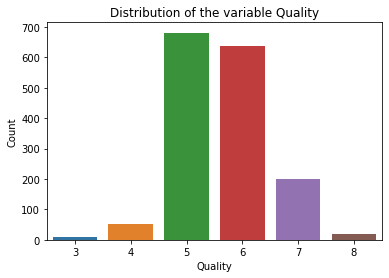

In [80]:
#(Distribution of the variable Quality)
sns.countplot(x='quality', data=df)
plt.xlabel('Quality')  
plt.ylabel('Count')  
plt.title('Distribution of the variable Quality')   

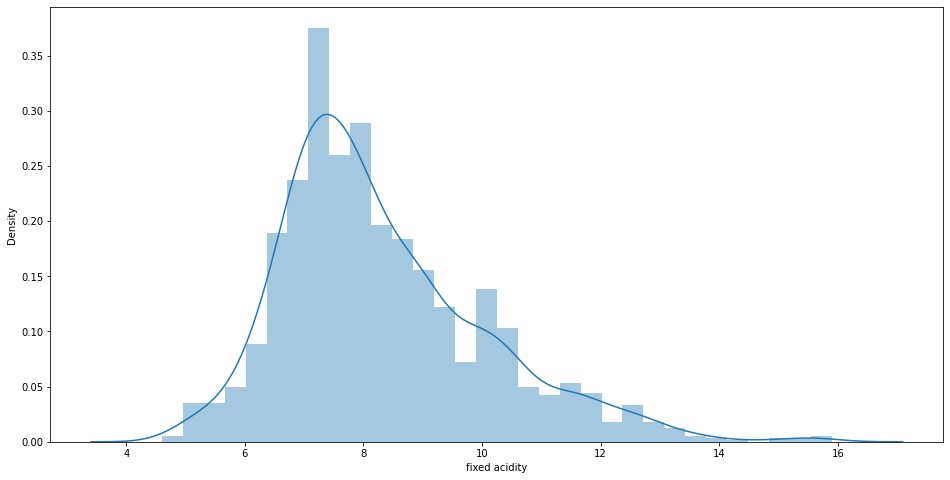

In [81]:
#(Fixed Acidity)
plt.figure(figsize=(16, 8))
sns.distplot(df["fixed acidity"])

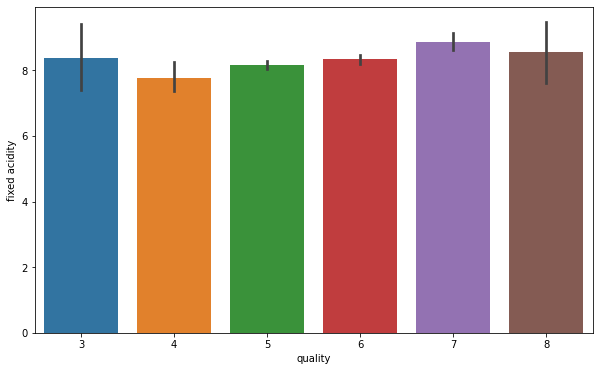

In [82]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

Fixed Acidity hat möglicherweise keinen großen Einfluss auf die Stimmenteilung.

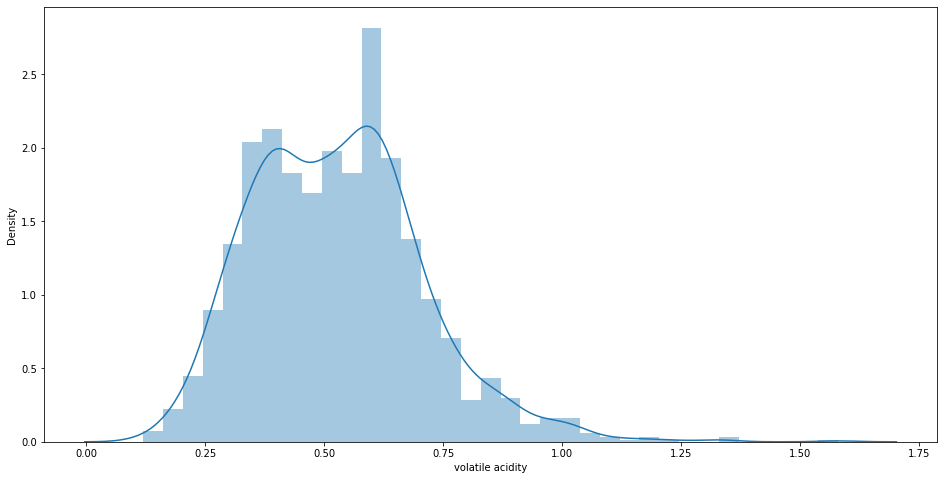

In [83]:
#(Volatile Acidity)
plt.figure(figsize=(16, 8))
sns.distplot(df["volatile acidity"])

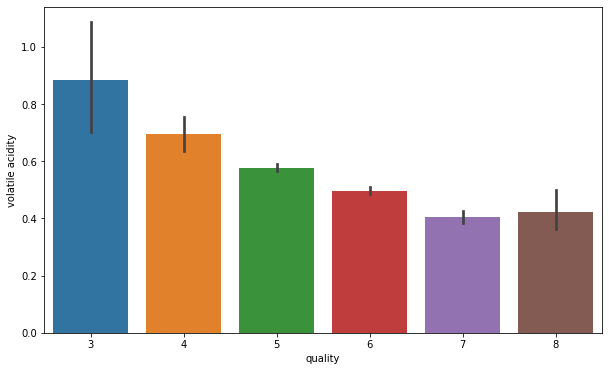

In [84]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

We can say that the decrease in volatile acidity almost positively affects the votes.

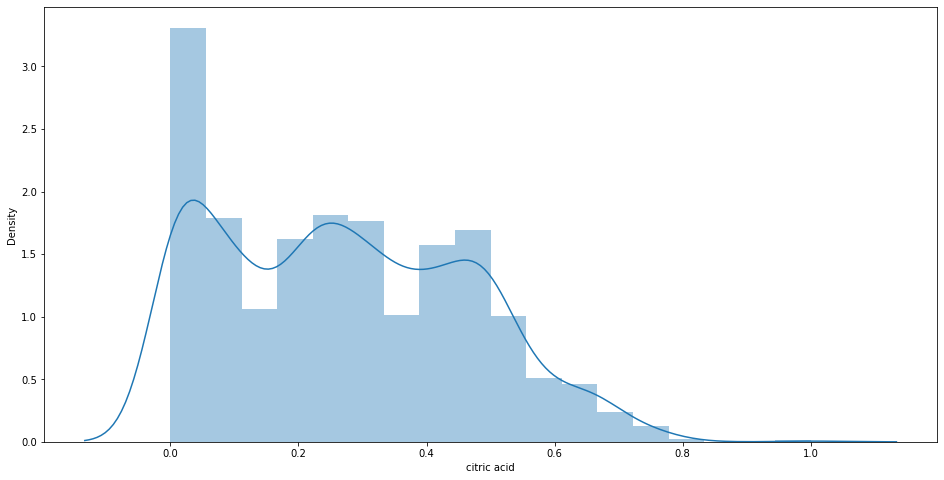

In [85]:
#(Citric Acid)
plt.figure(figsize=(16, 8))
sns.distplot(df["citric acid"])

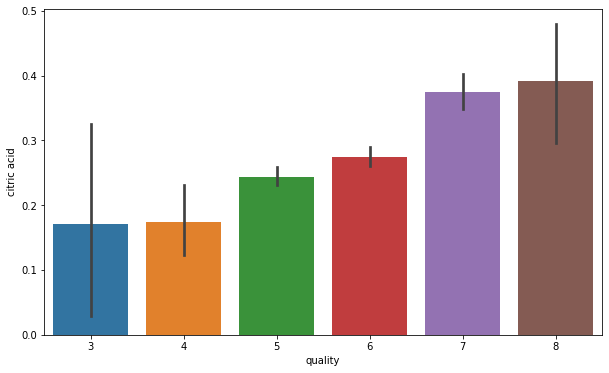

In [86]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

We can say that the increase in citric acid affects the votes positively.

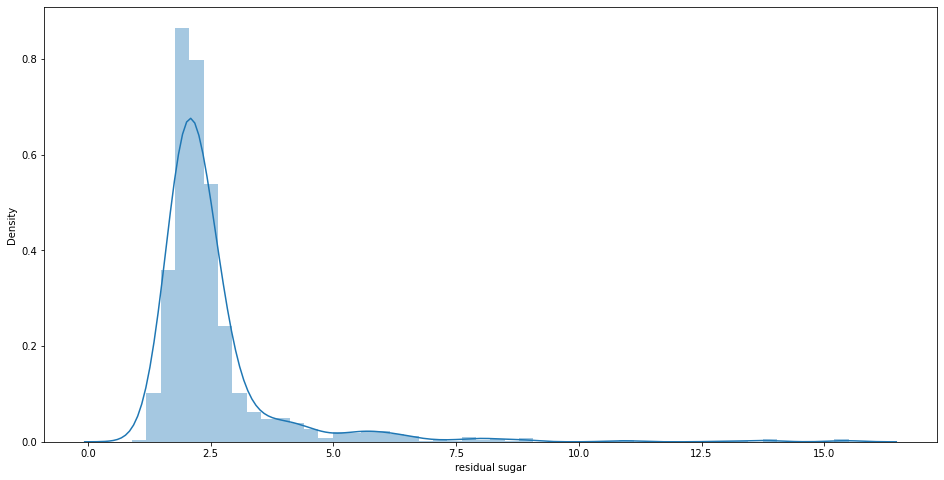

In [87]:
#(Residual Sugar)
plt.figure(figsize=(16, 8))
sns.distplot(df["residual sugar"])

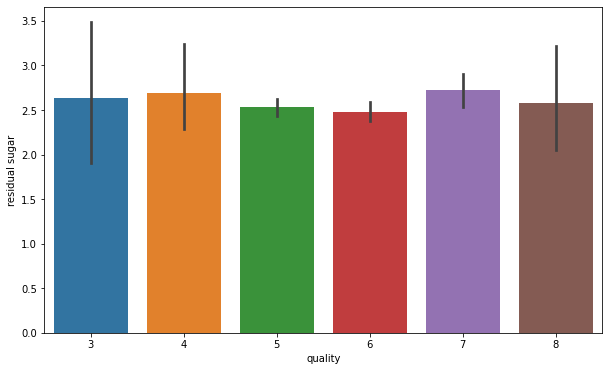

In [88]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

The estimate of residual sugar does not seem to have much effect like fixed acidity

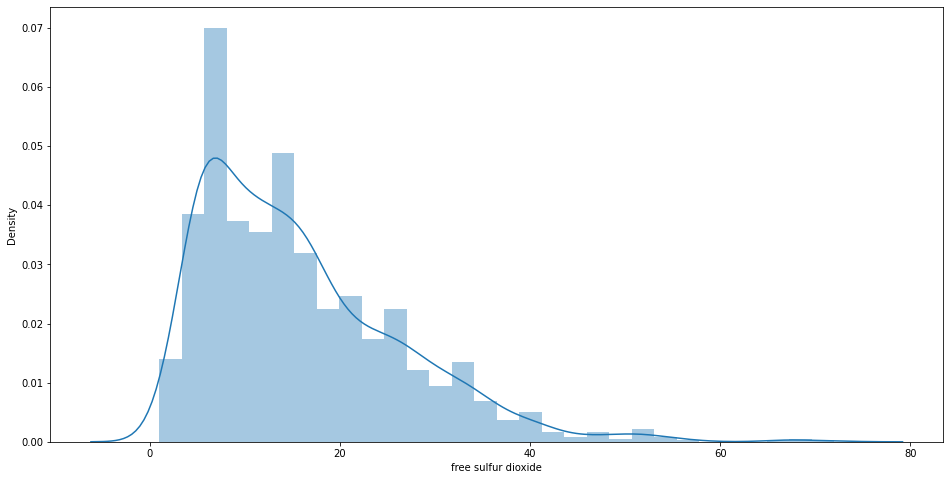

In [89]:
#(Free Sulfur Dioxide)
plt.figure(figsize=(16, 8))
sns.distplot(df["free sulfur dioxide"])

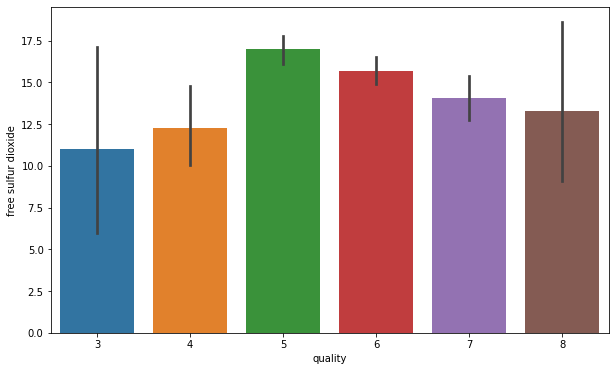

In [90]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

No Regular Effect (varsa da ben göremedim..)

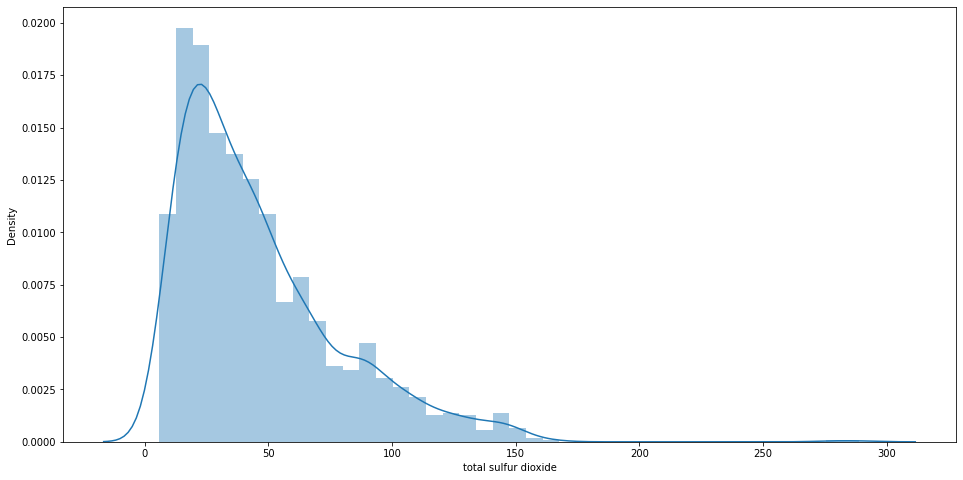

In [91]:
plt.figure(figsize=(16, 8))
sns.distplot(df["total sulfur dioxide"])

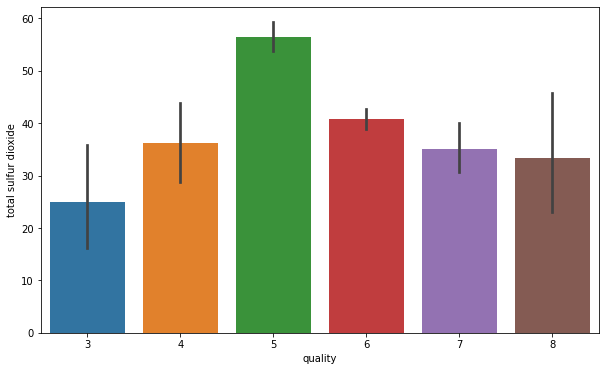

In [92]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

No Regular Effect (varsa da ben göremedim..)

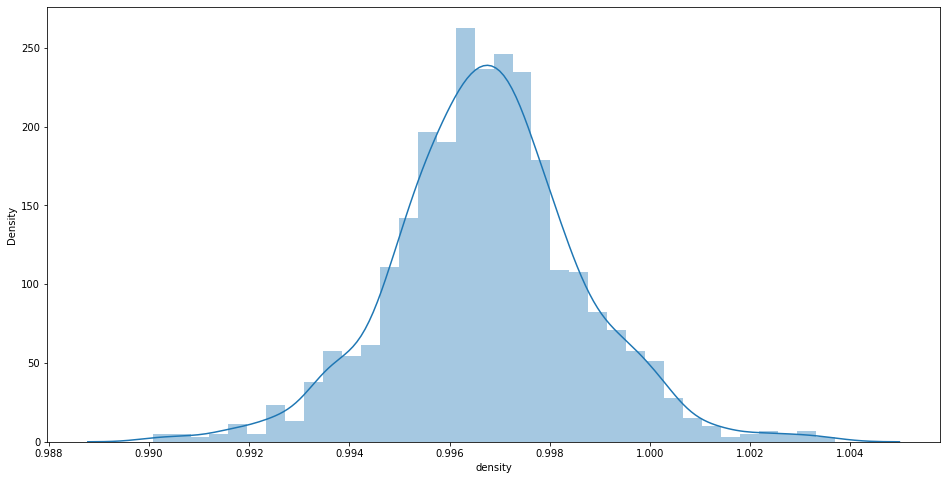

In [93]:
#(Density)
plt.figure(figsize=(16, 8))
sns.distplot(df["density"])

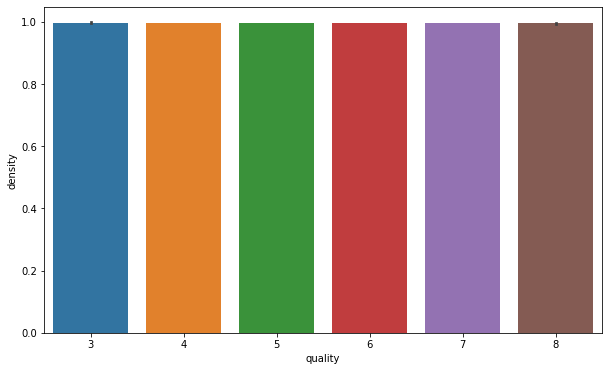

In [94]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

Normal distribution (skewness yapabilseydim yapmayacaktım buna nays)

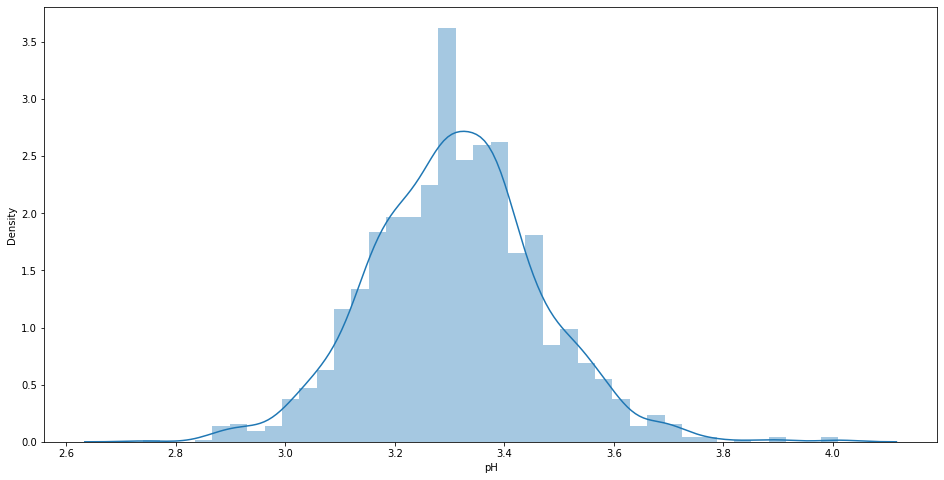

In [95]:
#(pH)
plt.figure(figsize=(16, 8))
sns.distplot(df["pH"])

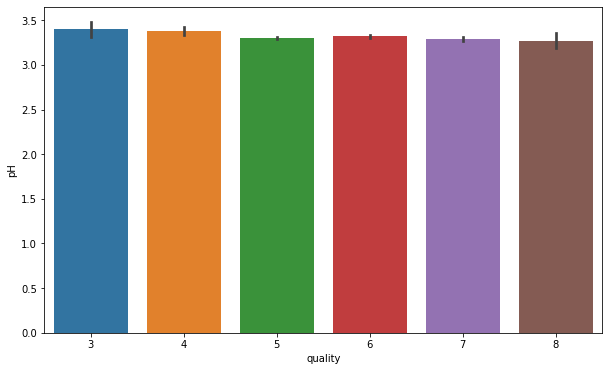

In [96]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

We can say that the decrease in pH value has a positive effect on the votes. (Outliers)

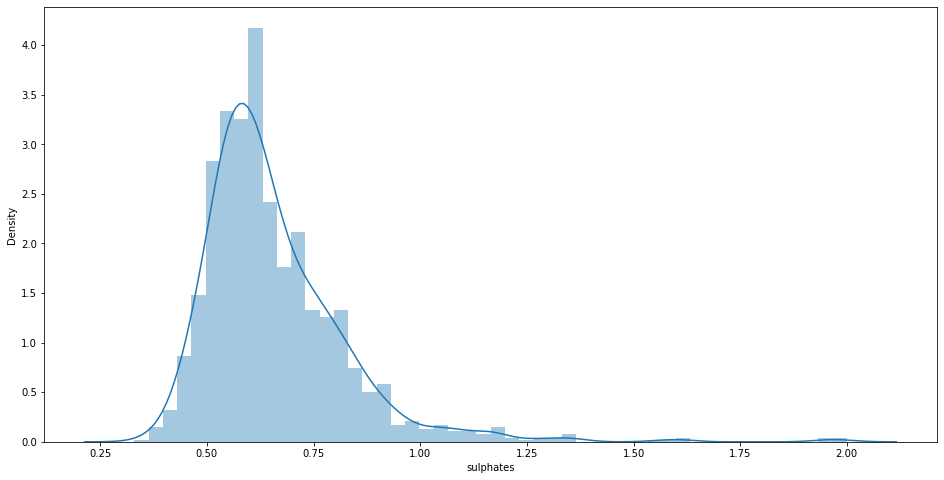

In [97]:
#(Sulphates)
plt.figure(figsize=(16, 8))
sns.distplot(df["sulphates"])

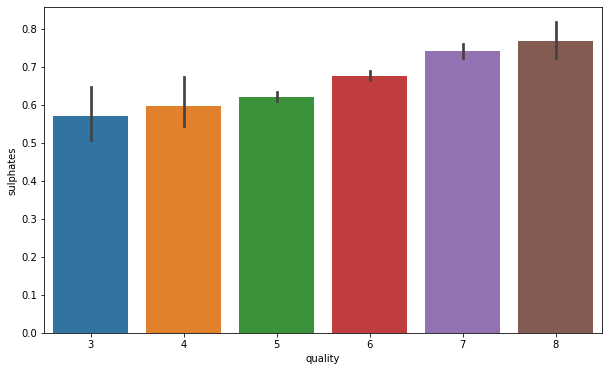

In [98]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

We can say that the higher the value of the sulphates, the more positive the votes are. (Outliers as we see the first graph)

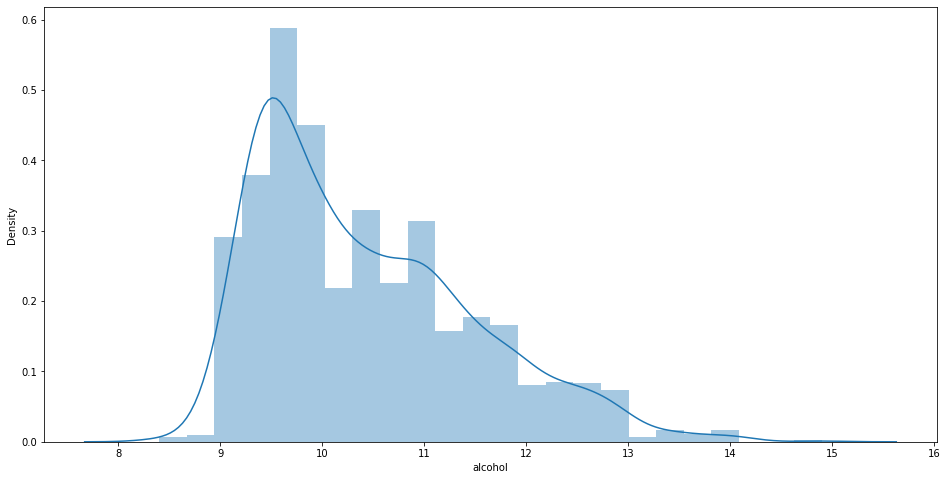

In [99]:
#(Alcohol)
plt.figure(figsize=(16, 8))
sns.distplot(df["alcohol"])

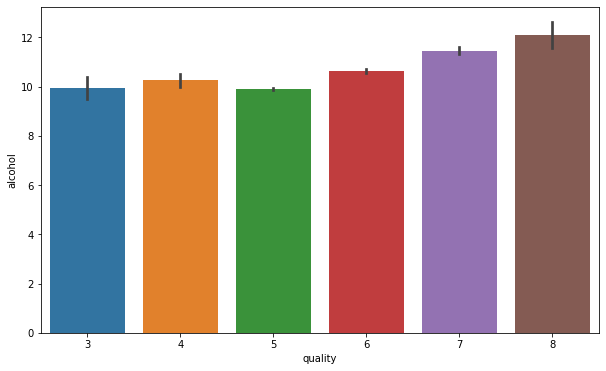

In [100]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

The higher the alcohol, the higher the quality.

# **Correlation Matrix**

In [169]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

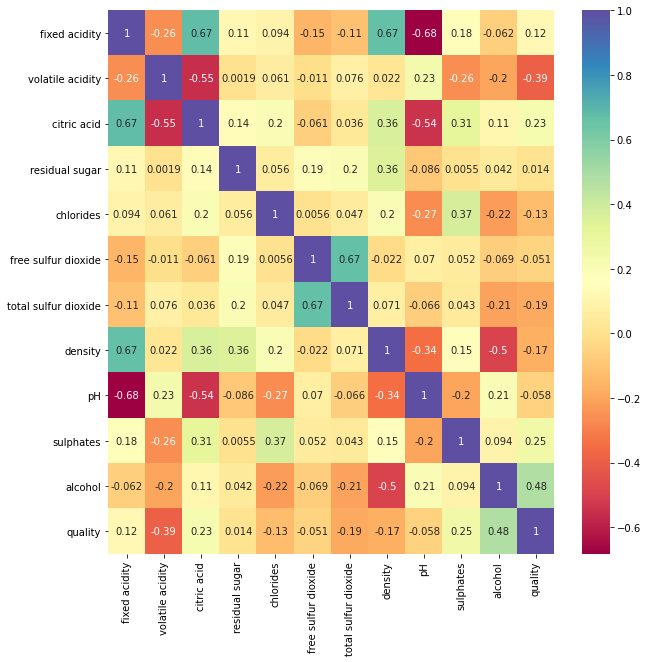

In [170]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Spectral', annot=True)

# **Skewness Correction**

In [171]:
#fixed acidity
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 8.31963727329581, sigma fixed acidity : 1.7405518001102729


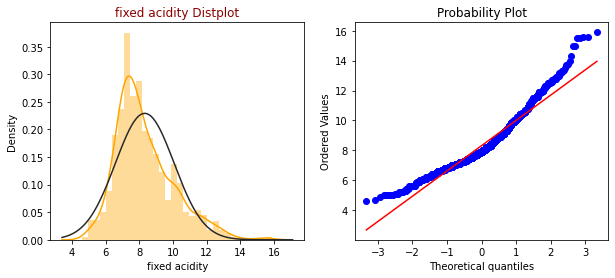

In [172]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["fixed acidity"], plot = plt)
plt.show()

In [173]:
data["fixed acidity"], lam_fixed_acidity = boxcox(data["fixed acidity"])

In [174]:
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 1.124655731469057, sigma fixed acidity : 0.048378082803535


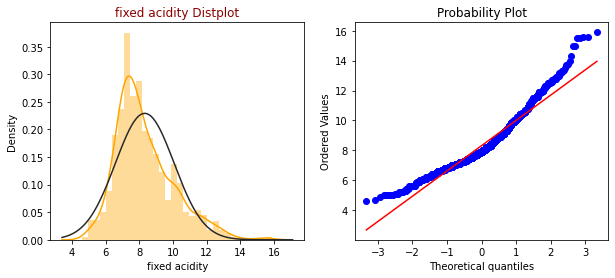

In [175]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["fixed acidity"], plot = plt)
plt.show()

In [176]:
#(residual sugar)
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 2.53880550343965, sigma residual sugar : 1.4094871124880495


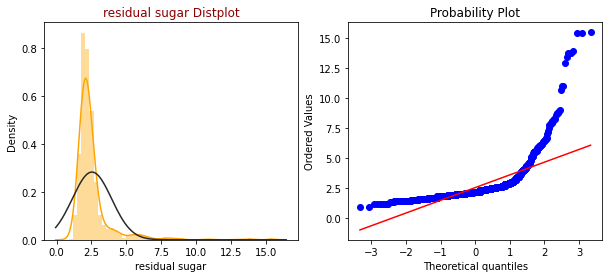

In [177]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["residual sugar"], plot = plt)
plt.show()

In [178]:
data["residual sugar"], lam_fixed_acidity = boxcox(data["residual sugar"])

In [179]:
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 0.5135558435839319, sigma residual sugar : 0.11004598444169933


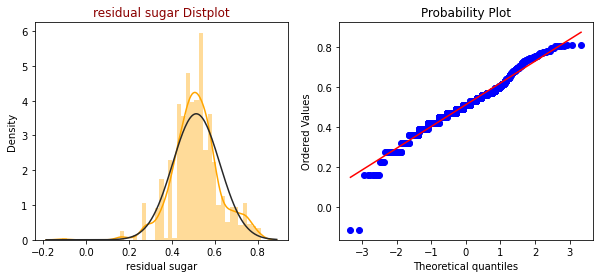

In [180]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["residual sugar"], plot = plt)
plt.show()

In [181]:
#(Free Sulfur Dioxide)
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 15.874921826141339, sigma free sulfur dioxide : 10.45688561493072


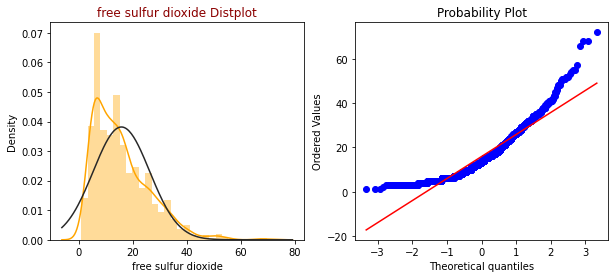

In [182]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

In [183]:
data["free sulfur dioxide"], lam_fixed_acidity = boxcox(data["free sulfur dioxide"])

In [184]:
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 3.1290485296425143, sigma free sulfur dioxide : 0.9855086968773705


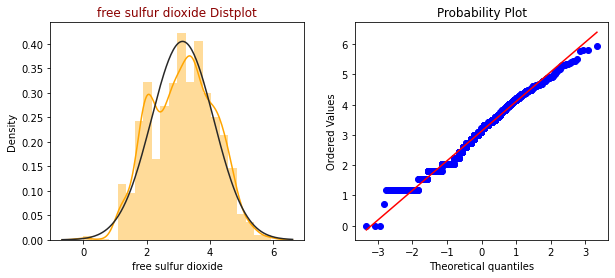

In [185]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

In [186]:
#(Total Sulfur Dioxide)
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 46.46779237023139, sigma total sulfur dioxide : 32.88503665178374


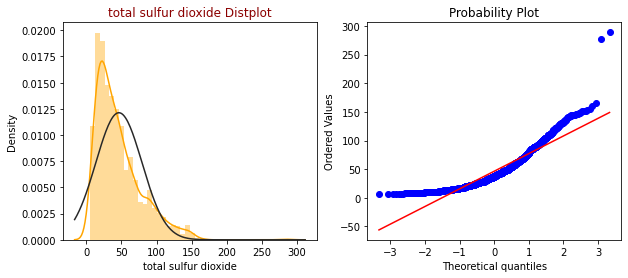

In [187]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

In [188]:
data["total sulfur dioxide"], lam_fixed_acidity = boxcox(data["total sulfur dioxide"])

In [189]:
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 3.9657192644535324, sigma total sulfur dioxide : 0.8459104716754929


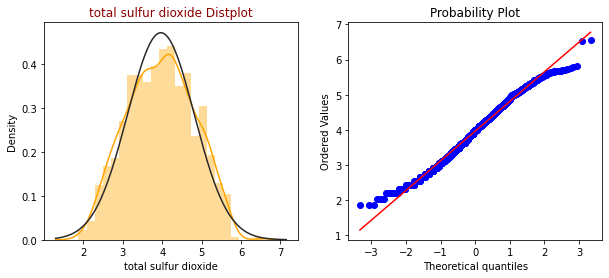

In [190]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

In [191]:
#(Alcohol)
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 10.422983114446529, sigma alcohol : 1.0653343003437483


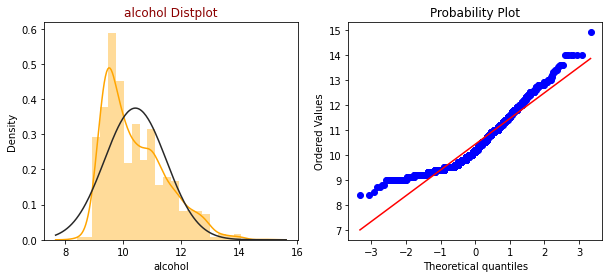

In [192]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()

In [193]:
data["alcohol"], lam_fixed_acidity = boxcox(data["alcohol"])

In [194]:
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 0.3005237243397624, sigma alcohol : 3.922651387741175e-05


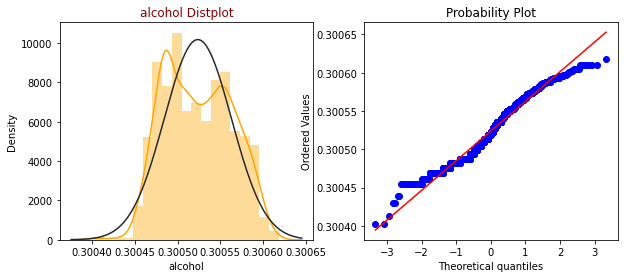

In [195]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()

# **Outlier Detection**

In [196]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [197]:
print("number of outliers detected --> ",len(data.loc[detect_outliers(data,data.columns[:-1])]))
data.loc[detect_outliers(data,data.columns[:-1])]

number of outliers detected -->  68


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,0.520,0.15,0.494302,0.054,2.427186,4.649352,0.99340,3.90,0.56,0.300598,4
94,0.985731,1.020,0.04,0.277689,0.045,4.920668,4.983161,0.99380,3.75,0.48,0.300535,4
95,0.964194,0.600,0.17,0.530233,0.058,3.504207,5.261323,0.99320,3.85,0.60,0.300595,6
442,1.257350,0.685,0.76,0.666360,0.100,2.046206,4.144017,1.00320,2.95,0.68,0.300559,7
553,0.985731,1.040,0.24,0.360736,0.050,4.503448,5.136097,0.99340,3.74,0.62,0.300567,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1.153967,0.760,0.68,0.394331,0.414,3.590783,4.630198,0.99652,2.90,1.33,0.300462,6
1370,1.143543,0.780,0.51,0.394331,0.415,2.991877,4.668228,0.99623,3.00,1.17,0.300469,5
1371,1.106811,0.580,0.56,0.624358,0.153,1.812859,2.823886,0.99476,3.21,1.03,0.300569,6
1372,1.143543,0.780,0.51,0.394331,0.415,2.991877,4.668228,0.99623,3.00,1.17,0.300469,5


In [198]:
data = data.drop(detect_outliers(data,data.columns[:-1]),axis = 0).reset_index(drop = True)

# **Split Train and Test dataset.**

In [199]:
bins = (2, 6.5, 8)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [200]:
data['quality'].value_counts()

0    1323
1     208
Name: quality, dtype: int64

UNBALANCED

In [201]:
y = data.quality
x = data.drop(["quality"], axis = 1)

In [202]:
#Splitting dataset
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 206)

**Smote**-----> Fixing unbalanced data

In [203]:
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [204]:
print("Before smote --> ", collections.Counter(Y_train))
print("After smote --> ", collections.Counter(y_train_sm))

Before smote -->  Counter({0: 1052, 1: 172})
After smote -->  Counter({0: 1052, 1: 1052})


**StandardScaler**

In [205]:
#Applying Standard scaling to get optimized result
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

In [206]:
results = []

# **K Nearest Neighbors Classifier**

Score :  0.9283387622149837
KNeighborsClassifier Acc :  0.9283387622149837


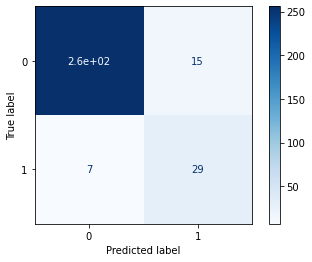

In [65]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("KNeighborsClassifier Acc : ", acc)

plot_confusion_matrix(knn, X_test, Y_test, cmap= "Blues")  
plt.show()

In [40]:
print(" \t \t  KNN Classification Report")
print(classification_report(Y_test, y_pred))

 	 	  KNN Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       271
           1       0.66      0.81      0.73        36

    accuracy                           0.93       307
   macro avg       0.82      0.88      0.84       307
weighted avg       0.94      0.93      0.93       307



# **Random Forest Classifier**

Score :  0.9576547231270358
RandomForestClassifier Acc :  0.9576547231270358


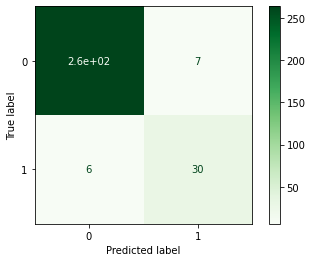

In [66]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = False)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)

acc = accuracy_score(Y_test, y_pred_rf)
score = rf.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("RandomForestClassifier Acc : ", acc)

plot_confusion_matrix(rf, X_test, Y_test, cmap= "Greens")  
plt.show()

In [42]:
print(" \t \t  RandomForestClassifier Classification Report")
print(classification_report(Y_test, y_pred_rf))

 	 	  RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       271
           1       0.81      0.83      0.82        36

    accuracy                           0.96       307
   macro avg       0.89      0.90      0.90       307
weighted avg       0.96      0.96      0.96       307



# **SVC**

Score :  0.8599348534201955
SVC Acc :  0.8599348534201955


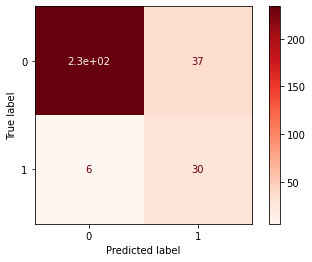

In [50]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(Y_test, pred_svc)
acc = accuracy_score(Y_test, pred_svc)
score = svc.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("SVC Acc : ", acc)

plot_confusion_matrix(svc, X_test, Y_test, cmap= "Reds")  
plt.show()

In [51]:
print(" \t \t  SVC Classification Report")
print(classification_report(Y_test, pred_svc))

 	 	  SVC Classification Report
              precision    recall  f1-score   support

           0       0.97      0.86      0.92       271
           1       0.45      0.83      0.58        36

    accuracy                           0.86       307
   macro avg       0.71      0.85      0.75       307
weighted avg       0.91      0.86      0.88       307



# **Model Results**

In [57]:
df_result = pd.DataFrame({"Score":results, "ML Models":["KNN","SVC","RandomForestClassifier"]})

In [62]:
df_result.style.background_gradient("Blues")

,Score,ML Models
0,0.928339,KNN
1,0.957655,SVC
2,0.859935,RandomForestClassifier


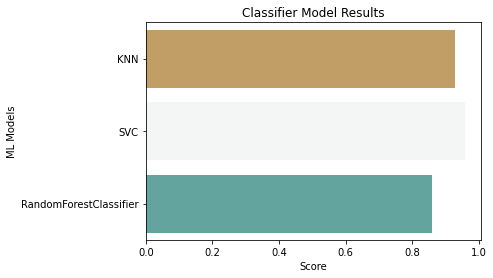

In [63]:
res = sns.barplot("Score", "ML Models", data = df_result, palette='BrBG')
res.set_xlabel("Score")
res.set_title("Classifier Model Results", color = "Black")
plt.show()